In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.learner import *
from fastai.column_data import *

In [65]:
path = 'data/cf-Ads/QAC/'
#file = 'QLJ_AC.100k.csv'
file = 'QLJ_AC_Ids.csv'

In [66]:
ratings = pd.read_csv(path+file)
ratings.head()

,queryId,listingId,rating
0,1,1459316,1
1,2,575963,2
2,3,2510887,2
3,4,3030705,1
4,5,4253189,1


In [67]:
g=ratings.groupby('queryId')['rating'].count()
topQueries = g.sort_values(ascending=False)[:30]
topQueries

queryId
330251     2066
1013954    1953
666611     1885
841045     1752
479965     1611
1048205    1601
511658     1465
77569      1465
997999     1450
858282     1428
1116841    1425
319476     1409
88120      1403
1001785    1383
553284     1363
1039288    1318
841046     1317
331186     1316
884337     1310
424461     1309
917123     1300
422289     1281
807030     1260
1137708    1253
1021740    1232
386071     1223
973418     1219
845857     1216
234327     1201
761054     1181
Name: rating, dtype: int64

In [68]:
g=ratings.groupby('listingId')['rating'].count()
topListings = g.sort_values(ascending=False)[:30]
topListings

listingId
583002     1395
4712658    1264
587053      865
4462659     712
2146932     648
3226086     624
1402042     569
3202460     543
3574111     465
1234582     455
2164869     437
650324      414
758782      405
2364674     388
2664399     371
1207954     340
591084      315
2571645     309
900668      284
199614      282
448985      281
2179830     277
1272210     276
4753116     265
4514261     252
2993190     252
3420186     250
3621160     246
2537561     241
4268421     241
Name: rating, dtype: int64

In [57]:
top_r = ratings.join(topQueries, rsuffix='_r', how='inner', on='queryId')
top_r = top_r.join(topListings, rsuffix='_r', how='inner', on='listingId')

In [58]:
top_r

,queryId,listingId,rating,rating_r,rating_r
471071,88120,2179830,1,1403,277
3479544,666611,2179830,3,1885,277
5256598,1013954,2179830,3,1953,277
1701773,330251,587053,1,2066,865
1709176,331186,587053,1,1316,865
1997631,386071,587053,1,1223,865
2506554,479965,587053,1,1611,865
2872505,553284,587053,1,1363,865
3478936,666611,587053,1,1885,865
4364577,841046,587053,1,1317,865


In [59]:
#pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)
pd.crosstab(top_r.queryId, top_r.listingId, top_r.rating, aggfunc=np.sum)

listingId,583002,587053,591084,650324,758782,1234582,2146932,2179830,2364674,4268421
queryId,,,,,,,,,,
88120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
330251,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
331186,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
386071,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
479965,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
553284,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
666611,1.0,1.0,NaN,NaN,NaN,NaN,1.0,3.0,NaN,NaN
841045,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
841046,NaN,1.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN


In [69]:
val_idxs = get_cv_idxs(len(ratings))
wd = 2e-4
n_factors = 50
bs = 64
lr = 1e-2

In [70]:
cf = CollabFilterDataset.from_csv(path, file, 'queryId', 'listingId', 'rating')
learn = cf.get_learner(n_factors, val_idxs, bs, opt_fn=optim.Adam)

In [72]:
learn

EmbeddingDotBias(
  (u): Embedding(1194335, 50)
  (i): Embedding(4800168, 50)
  (ub): Embedding(1194335, 1)
  (ib): Embedding(4800168, 1)
)

In [64]:
learn.fit(lr, 2, wds=wd, cycle_len=1, cycle_mult=2)

  0%|                                                                | 34/77005 [03:17<124:21:46,  5.82s/it, loss=1.76]

KeyboardInterrupt: 

In [23]:
preds = learn.predict()

C:\Users\hasun\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hasun\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


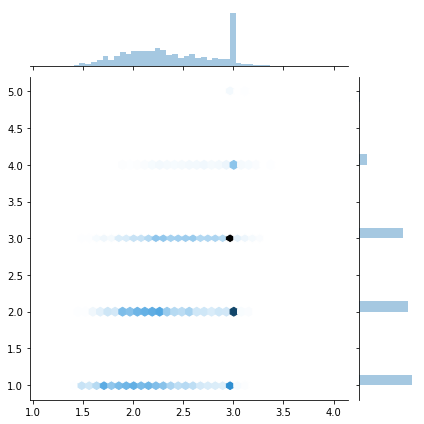

In [24]:
y=learn.data.val_y
# seaborn is a really great plotting library, it sits on top of matplotlib
sns.jointplot(preds, y, kind='hex', stat_func=None);

In [25]:
learn.fit(lr, 2, wds=wd, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss                                                                                         
    0      0.831684   0.860168  
    1      0.813737   0.831401                                                                                         
    2      0.69404    0.831534                                                                                         



[array([ 0.83153])]

C:\Users\hasun\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\hasun\AppData\Local\Continuum\anaconda3\envs\fastai\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


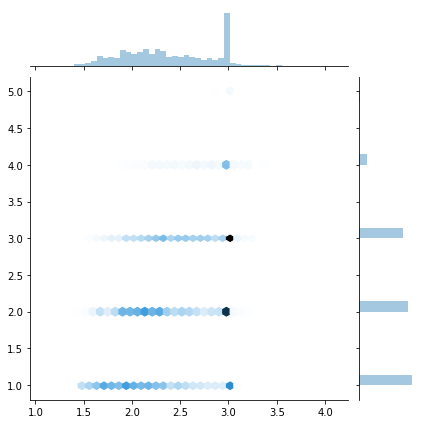

In [26]:
preds = learn.predict()
y=learn.data.val_y
sns.jointplot(preds, y, kind='hex', stat_func=None);

In [27]:
y

array([ 5.,  1.,  4., ...,  1.,  1.,  1.], dtype=float32)

In [28]:
preds

array([ 3.     ,  2.60815,  2.81729, ...,  1.59518,  1.59518,  1.59518], dtype=float32)

In [29]:
len(y)

20000